In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
import random
from datetime import datetime

In [19]:
import keras 
from keras.models import Sequential
from keras.layers import Activation,Dense,Conv2D,Dropout,Flatten,BatchNormalization,Reshape,UpSampling2D,Conv2DTranspose
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import RMSprop,Adam

Using TensorFlow backend.


In [48]:
ds=pd.read_csv('../data/mnist_data/train.csv')
#ds=pd.read_csv('./input/train.csv')

In [49]:
data=np.array(ds)

In [50]:
X=data[:10000,1:]

In [51]:
X=np.reshape(X,(10000,28,28,1))

In [52]:
D=Sequential()
depth=64
dropout=0.4
D.add(Conv2D(64,5,strides=2,input_shape=(28,28,1),padding='same'))
D.add(LeakyReLU(alpha=0.2))
D.add(Dropout(dropout))
D.add(Conv2D(128,5,strides=2,padding='same'))
D.add(LeakyReLU(alpha=0.2))
D.add(Dropout(dropout))
D.add(Conv2D(256,5,strides=2,padding='same'))
D.add(LeakyReLU(alpha=0.2))
D.add(Dropout(dropout))
D.add(Conv2D(512,5,strides=1,padding='same'))
D.add(LeakyReLU(alpha=0.2))
D.add(Dropout(dropout))
D.add(Flatten())
D.add(Dense(1))
D.add(Activation('sigmoid'))
D.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 256)         819456    
__________

In [53]:
G=Sequential()
dropout=0.4
G.add(Dense(12544,input_shape=(100,)))
G.add(BatchNormalization(momentum=0.9))
G.add(Activation('relu'))
G.add(Reshape((7,7,256)))
G.add(Dropout(dropout))
G.add(UpSampling2D())
G.add(Conv2DTranspose(128,5,padding='same'))
G.add(BatchNormalization(momentum=0.9))
G.add(Activation('relu'))
G.add(UpSampling2D())
G.add(Conv2DTranspose(64,5,padding='same'))
G.add(BatchNormalization(momentum=0.9))
G.add(Activation('relu'))
G.add(Conv2DTranspose(32,5,padding='same'))
G.add(BatchNormalization(momentum=0.9))
G.add(Activation('relu'))
G.add(Conv2DTranspose(1,5,padding='same'))
G.add(Activation('sigmoid'))
G.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization_13 (Batc (None, 12544)             50176     
_________________________________________________________________
activation_21 (Activation)   (None, 12544)             0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 7, 7, 256)         0         
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_transpose_13 (Conv2DT (None, 14, 14, 128)       819328    
__________

In [54]:
optimizer = RMSprop(lr=0.0008, clipvalue=1.0, decay=6e-8)
D.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [55]:
optimizer_G = RMSprop(lr=0.0004, clipvalue=1.0, decay=3e-8)
AM=Sequential()
AM.add(G)
AM.add(D)
AM.compile(loss='binary_crossentropy',optimizer=optimizer_G,metrics=['accuracy'])

In [56]:
t1=datetime.now()
for epoch in range(1):
    noise=np.random.uniform(-1,1,size=[1000,100])
    images_fake=G.predict(noise)
    rand_no=random.randint(0,8999)
    x=np.concatenate((X[rand_no:rand_no+1000],images_fake))
    y=np.ones([2000,1])
    y[1000:,:]=0
    D.train_on_batch(x, y)
    y = np.ones([1000, 1])
    noise = np.random.uniform(-1.0, 1.0, size=[1000, 100])
    a_loss=AM.train_on_batch(noise,y)
t2=datetime.now()

In [57]:
from keras.models import load_model
G.save('G.h5')
D.save('D.h5')

In [59]:
#print str(t2-t1)[:7]

0:03:38


In [60]:
#noise=np.random.uniform(-1,1,size=[10,100])
#images_fake=G.predict(noise)

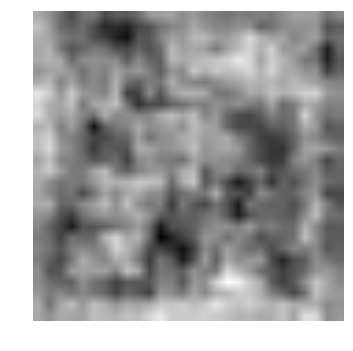

In [61]:
#test=np.reshape(images_fake[5],(28,28))
#plt.imshow(test,cmap='gray')
#plt.axis('off')
#plt.show()

(28, 28, 4)


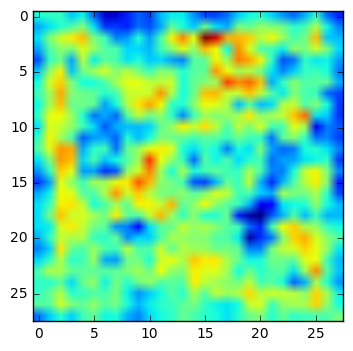

In [12]:
im=plt.imread('name.png')
print im.shape
plt.imshow(im)
plt.show()

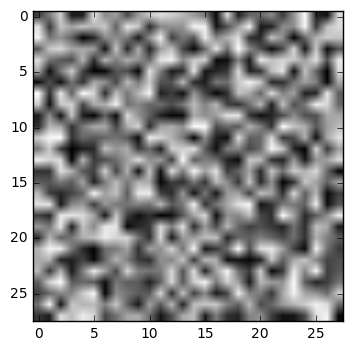

In [17]:
a=np.random.random((28,28))
plt.imshow(a,cmap='gray')
plt.imsave('a.png',a,cmap='gray')
plt.show()

In [18]:
name=str(5)+'.png'
print name

5.png


In [21]:
Adam(lr=0.0008, clipvalue=1.0, decay=6e-8)